In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

In [2]:
bankNote=pd.read_csv('banknote.csv')
car=pd.read_csv('car.csv')
bankNote=shuffle(bankNote)

In [3]:
from scipy.io import arff
import pandas as pd

In [5]:
data = arff.loadarff('emotions.arff')
df = pd.DataFrame(data[0])
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


In [4]:
#Import the keras model and dense layer
from keras.models import Sequential
from keras.layers import Dense

In [5]:
X=bankNote.drop('class', axis=1).values
y=bankNote['class'].values

In [6]:
model.fit(X,y, epochs=10, validation_split=0.2)

NameError: name 'model' is not defined

In [19]:
model.evaluate(X,y)

43/43 [==============================] - 0s 950us/step - loss: 0.6125


0.6124641299247742

In [7]:
#preparing the dataset
emotions=pd.read_csv('emotions_out.csv')
X=emotions.drop(columns=['amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely','angry-aggresive']).values
y=emotions[['amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely','angry-aggresive']].values

In [8]:
emotions.shape

(593, 78)

In [9]:
# Secondly we will create model for emotions dataset
# this is a categorical dataset
model=Sequential()
model.add(Dense(25, input_shape=(72,), activation="tanh"))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(6, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics='accuracy')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1825      
                                                                 
 dense_1 (Dense)             (None, 20)                520       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 6)                 96        
                                                                 
Total params: 2,756
Trainable params: 2,756
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 3.3862 - accuracy: 0.2954 - val_loss: 3.5446 - val_accuracy: 0.2773
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 3.3547 - accuracy: 0.2954 - val_loss: 3.5217 - val_accuracy: 0.2773
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 3.3445 - accuracy: 0.2954 - val_loss: 3.5095 - val_accuracy: 0.2773
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 3.3359 - accuracy: 0.2954 - val_loss: 3.4990 - val_accuracy: 0.3277
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 3.3292 - accuracy: 0.3228 - val_loss: 3.4894 - val_accuracy: 0.3025
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 3.3233 - accuracy: 0.2996 - val_loss: 3.4861 - val_accuracy: 0.3025
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 3.3210 - accuracy: 0.3397 - val_loss: 3.4843 - val_accuracy: 0.3866
Epoch 8/100


In [11]:
# Lastly we will create model for multi label
# this is a categorical dataset
model=Sequential()
model.add(Dense(25, input_shape=(72,), activation="tanh"))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(6, activation="sigmoid"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics='accuracy')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                1825      
                                                                 
 dense_5 (Dense)             (None, 20)                520       
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dense_7 (Dense)             (None, 6)                 96        
                                                                 
Total params: 2,756
Trainable params: 2,756
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X,y, epochs=20)

Epoch 1/20
19/19 [==============================] - 1s 837us/step - loss: 3.5050 - accuracy: 0.0725
Epoch 2/20
19/19 [==============================] - 0s 1ms/step - loss: 3.3928 - accuracy: 0.0877
Epoch 3/20
19/19 [==============================] - 0s 997us/step - loss: 3.3411 - accuracy: 0.2024
Epoch 4/20
19/19 [==============================] - 0s 1ms/step - loss: 3.3259 - accuracy: 0.2884
Epoch 5/20
19/19 [==============================] - 0s 1ms/step - loss: 3.3217 - accuracy: 0.2884
Epoch 6/20
19/19 [==============================] - 0s 1ms/step - loss: 3.3234 - accuracy: 0.2884
Epoch 7/20
19/19 [==============================] - 0s 994us/step - loss: 3.3250 - accuracy: 0.2884
Epoch 8/20
19/19 [==============================] - 0s 1ms/step - loss: 3.3253 - accuracy: 0.2884
Epoch 9/20
19/19 [==============================] - 0s 1ms/step - loss: 3.3248 - accuracy: 0.2884
Epoch 10/20
19/19 [==============================] - 0s 1ms/step - loss: 3.3246 - accuracy: 0.2884
Epoch 11/20
1

In [30]:
sample=X[1:3]
print(sample.shape)
model.predict(sample)

(2, 72)


array([[0.9973494 , 0.9971874 , 0.9979739 , 0.99662703, 0.99704635,
        0.99767977],
       [0.9973477 , 0.9971852 , 0.9979691 , 0.99661744, 0.9970423 ,
        0.99768007]], dtype=float32)

## Keras Call backs

In [39]:
bankNote=pd.read_csv('banknote.csv')
bankNote=shuffle(bankNote)
X=bankNote.drop('class', axis=1).values
y=bankNote['class'].values

# First we will create model for bank note dataset
# this is a binary dataset
model=Sequential()
model.add(Dense(2, input_shape=(4,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics='accuracy')
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [32]:
history=model.fit(X, y, epochs=20, validation_split=0.3)
print(history.history['accuracy'])

Epoch 1/20
30/30 [==============================] - 1s 5ms/step - loss: 2.2422 - accuracy: 0.3729 - val_loss: 2.0751 - val_accuracy: 0.3617
Epoch 2/20
30/30 [==============================] - 0s 1ms/step - loss: 2.0428 - accuracy: 0.3854 - val_loss: 1.8853 - val_accuracy: 0.3883
Epoch 3/20
30/30 [==============================] - 0s 1ms/step - loss: 1.8651 - accuracy: 0.4000 - val_loss: 1.7038 - val_accuracy: 0.4005
Epoch 4/20
30/30 [==============================] - 0s 1ms/step - loss: 1.6943 - accuracy: 0.3917 - val_loss: 1.5328 - val_accuracy: 0.4199
Epoch 5/20
30/30 [==============================] - 0s 1ms/step - loss: 1.5358 - accuracy: 0.3979 - val_loss: 1.3663 - val_accuracy: 0.4150
Epoch 6/20
30/30 [==============================] - 0s 1ms/step - loss: 1.3875 - accuracy: 0.3927 - val_loss: 1.2356 - val_accuracy: 0.4078
Epoch 7/20
30/30 [==============================] - 0s 1ms/step - loss: 1.2606 - accuracy: 0.3917 - val_loss: 1.1026 - val_accuracy: 0.4078
Epoch 8/20
30/30 [==

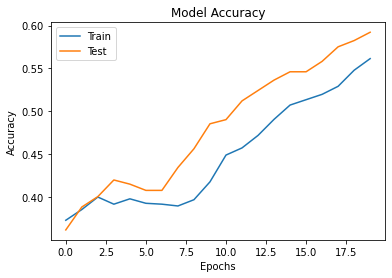

In [33]:
# we can print acc, val_loss, val_acc
#now lets plot the graphs of accuracy

import matplotlib.pyplot as plt

plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'])
plt.show()

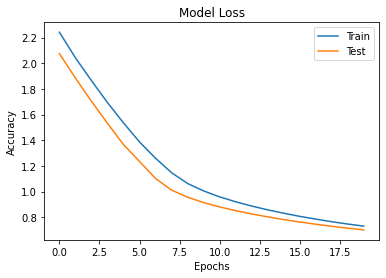

In [34]:
plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'])
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=11)

In [40]:
# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Train your model with the callback
model.fit(X_train, y_train, epochs=1000,validation_data=(X_test, y_test),callbacks = [early_stopping])

Epoch 1/1000
33/33 [==============================] - 1s 5ms/step - loss: 0.6797 - accuracy: 0.5996 - val_loss: 0.6698 - val_accuracy: 0.7055
Epoch 2/1000
33/33 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.7046 - val_loss: 0.6567 - val_accuracy: 0.7318
Epoch 3/1000
33/33 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.7396 - val_loss: 0.6409 - val_accuracy: 0.7551
Epoch 4/1000
33/33 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7638 - val_loss: 0.6182 - val_accuracy: 0.7638
Epoch 5/1000
33/33 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7891 - val_loss: 0.5932 - val_accuracy: 0.7872
Epoch 6/1000
33/33 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7940 - val_loss: 0.5654 - val_accuracy: 0.7843
Epoch 7/1000
33/33 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7920 - val_loss: 0.5364 - val_accuracy: 0.7813
Epoch 

In [41]:
# Import model checkpoint from keras callbacks
from keras.callbacks import ModelCheckpoint
# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True)
# Train your model with the callback
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks = [model_save])

Epoch 1/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9913
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9913
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9990 - val_loss: 0.0219 - val_accuracy: 0.9913
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9913
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9913
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9913
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9913
Epoch 8/100
3

#### Batch Normalization

In [42]:
from keras.layers import BatchNormalization

In [43]:
#preparing the dataset
emotions=pd.read_csv('emotions_out.csv')
X=emotions.drop(columns=['amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely','angry-aggresive']).values
y=emotions[['amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely','angry-aggresive']].values

# Secondly we will create model for emotions dataset
# this is a categorical dataset
model=Sequential()
model.add(Dense(25, input_shape=(72,), activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(20, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(15, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(6, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics='accuracy')
model.summary()
model.fit(X,y, epochs=100, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 25)                1825      
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 dense_15 (Dense)            (None, 20)                520       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 15)                315       
                                                                 
 batch_normalization_2 (Batc  (None, 15)              

#### Hyperparameter Tuning
1. Number of layers
2. Number of neurons per layer
3. Layer order
4. Layer activation
5. Batch Sizes
6. Learning Rates
7. Optimizers
8. Activation Function